In [8]:
# global parameters
DATA_DIR = '../datasets/swell/final'
TEST_DATA_NAME = 'test'
DO_SAVE_RESULTS = True
DO_COMPARE_MODELS = True
DO_PLOT_DATA = True

In [9]:
# install dependencies
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [10]:
# set up the environment
import os
os.environ['PYCARET_CUSTOM_LOGGING_LEVEL'] = 'CRITICAL'

import pandas as pd
pd.set_option('display.max_columns', 128)

from IPython.display import display_html

In [11]:
# prepare the data
from pathlib import Path
from pycaret.datasets import get_data
from zipfile import ZipFile

DATA = {
  name: None
  for name in ['train', TEST_DATA_NAME]
}

for data_name in DATA.keys():
  data_path = Path(DATA_DIR).joinpath(data_name)
  # extract the compressed data files
  ZipFile(data_path.with_suffix('.zip'), 'r').extract(
    str(data_path.with_suffix('.csv')), '..'
  )
  print(f'Data file "{data_name}" has been extracted successfully')
  # load the data
  print(f'Loading data file "{data_name}"')
  DATA[data_name] = get_data(dataset=f'{data_path}')

Data file "train" has been extracted successfully
Loading data file "train"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


Data file "test" has been extracted successfully
Loading data file "test"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,105.310967,1.262958,-0.703779,0.000081,-0.000951,0.017605,0.011208,0.011208,1.570800,1.262958,-0.703779,1016.073759,59.818117,615.914573,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,81.596693,-0.445806,-0.144911,0.000061,-0.001543,0.022969,0.011970,0.011970,1.918953,-0.445806,-0.144911,765.518473,32.452560,1566.866135,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,187.269500,-0.666523,-0.103725,-0.000055,-0.002000,0.022079,0.009606,0.009606,2.298473,-0.666523,-0.103725,2237.739905,51.696218,2074.868884,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,166.417439,-0.698096,-0.145092,0.000130,0.000445,0.014920,0.007051,0.007051,2.116033,-0.698096,-0.145092,2330.980957,81.661325,505.886664,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,203.382835,1.134111,0.769517,0.000310,-0.000170,0.019649,0.011689,0.011689,1.681034,1.134111,0.769517,4750.624447,89.465158,524.203971,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [12]:
# set column specifications
TARGET_NAME = 'condition'
IGNORE_NAMES = ['datasetId']

In [13]:
# custom target encoding
for data_name in DATA.keys():
  data = DATA[data_name]
  data[TARGET_NAME] = data[TARGET_NAME].map({
    'no stress': 0,
    'interruption': 1,
    'time pressure': 2,
  })

In [14]:
# establish an experiment
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(
  data=DATA['train'],
  test_data=DATA[TEST_DATA_NAME],
  target=TARGET_NAME,
  ignore_features=IGNORE_NAMES,
  index=False,
  session_id=123,
  remove_multicollinearity=True,
  multicollinearity_threshold=0.999,
  imputation_type=None,
  fold_shuffle=True,
)
display_html(exp.dataset_transformed)

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Multiclass
3,Original data shape,"(410322, 36)"
4,Transformed data shape,"(410322, 29)"
5,Transformed train set shape,"(369289, 29)"
6,Transformed test set shape,"(41033, 29)"
7,Ignore features,1
8,Numeric features,34
9,Preprocess,True


,MEAN_RR,MEDIAN_RR,SDRR,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157837,853.763733,140.972748,15.553371,9.063146,69.499954,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,2.143342,2661.894043,72.203285,1009.249390,27.375666,98.485260,15.522602,0.421047,1.514737,3686.666260,65.018051,0.015380,2.139754,1.163485,0
1,939.425354,948.357849,81.317741,12.964194,6.272368,64.363152,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,2.930855,2314.265381,76.975731,690.113281,22.954140,99.695396,2.108526,0.070133,0.304603,3006.487305,327.296631,0.003055,2.174499,1.084711,1
2,898.186035,907.006836,84.497238,16.305273,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,2.127053,1373.887085,51.152225,1298.222656,48.335102,98.950470,13.769730,0.512671,1.049528,2685.879395,94.280907,0.010607,2.135350,1.176315,1
3,881.757874,893.460022,90.370537,15.720068,5.748590,68.809563,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,2.050988,2410.357422,70.180305,1005.981689,29.290304,98.224709,18.181913,0.529387,1.775294,3434.520996,55.328701,0.018074,2.178341,1.179688,0
4,809.625305,811.184875,62.766243,19.213657,3.266724,74.565727,20.200001,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,1.816544,1151.177368,43.918365,1421.782104,54.242161,96.720009,48.215824,1.839473,3.279993,2621.175293,29.487873,0.033912,2.221121,1.249612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406494,1117.857056,113.955635,18.592072,6.129225,54.234180,18.799999,0.266667,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,3.091047,4130.820312,80.985077,969.550232,19.008112,99.964172,0.347514,0.006813,0.035830,5100.718262,2789.962891,0.000358,2.183460,1.082927,2
410318,855.991150,765.221436,296.763367,20.610744,14.389415,76.416969,15.733334,3.533333,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,1.742060,7163.989746,83.960220,1250.595825,14.656681,91.377083,118.014130,1.383097,8.622919,8532.599609,10.597001,0.094366,1.695327,1.154370,1
410319,689.388672,663.192749,133.815720,21.696138,6.166896,90.254005,13.933333,4.000000,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,1.706976,3946.374023,64.968895,1911.676636,31.471804,89.839592,216.200974,3.559302,10.160405,6074.251465,8.842128,0.113095,2.078000,1.214869,0
410320,761.421570,761.064575,60.792671,11.280573,5.389141,79.313782,2.733333,0.266667,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,1.705789,732.516968,54.756130,563.466614,42.119503,93.094383,41.797176,3.124367,6.905613,1337.780762,13.480973,0.074179,2.191379,1.234546,0


In [15]:
print('Removed columns: ',
  set(IGNORE_NAMES) |
  (
    set(exp.dataset.columns) -
    set(exp.dataset_transformed.columns)
  )
)

Removed columns:  {'SDSD_REL_RR', 'SD1', 'RMSSD', 'SKEW_REL_RR', 'KURT_REL_RR', 'SD2', 'datasetId'}


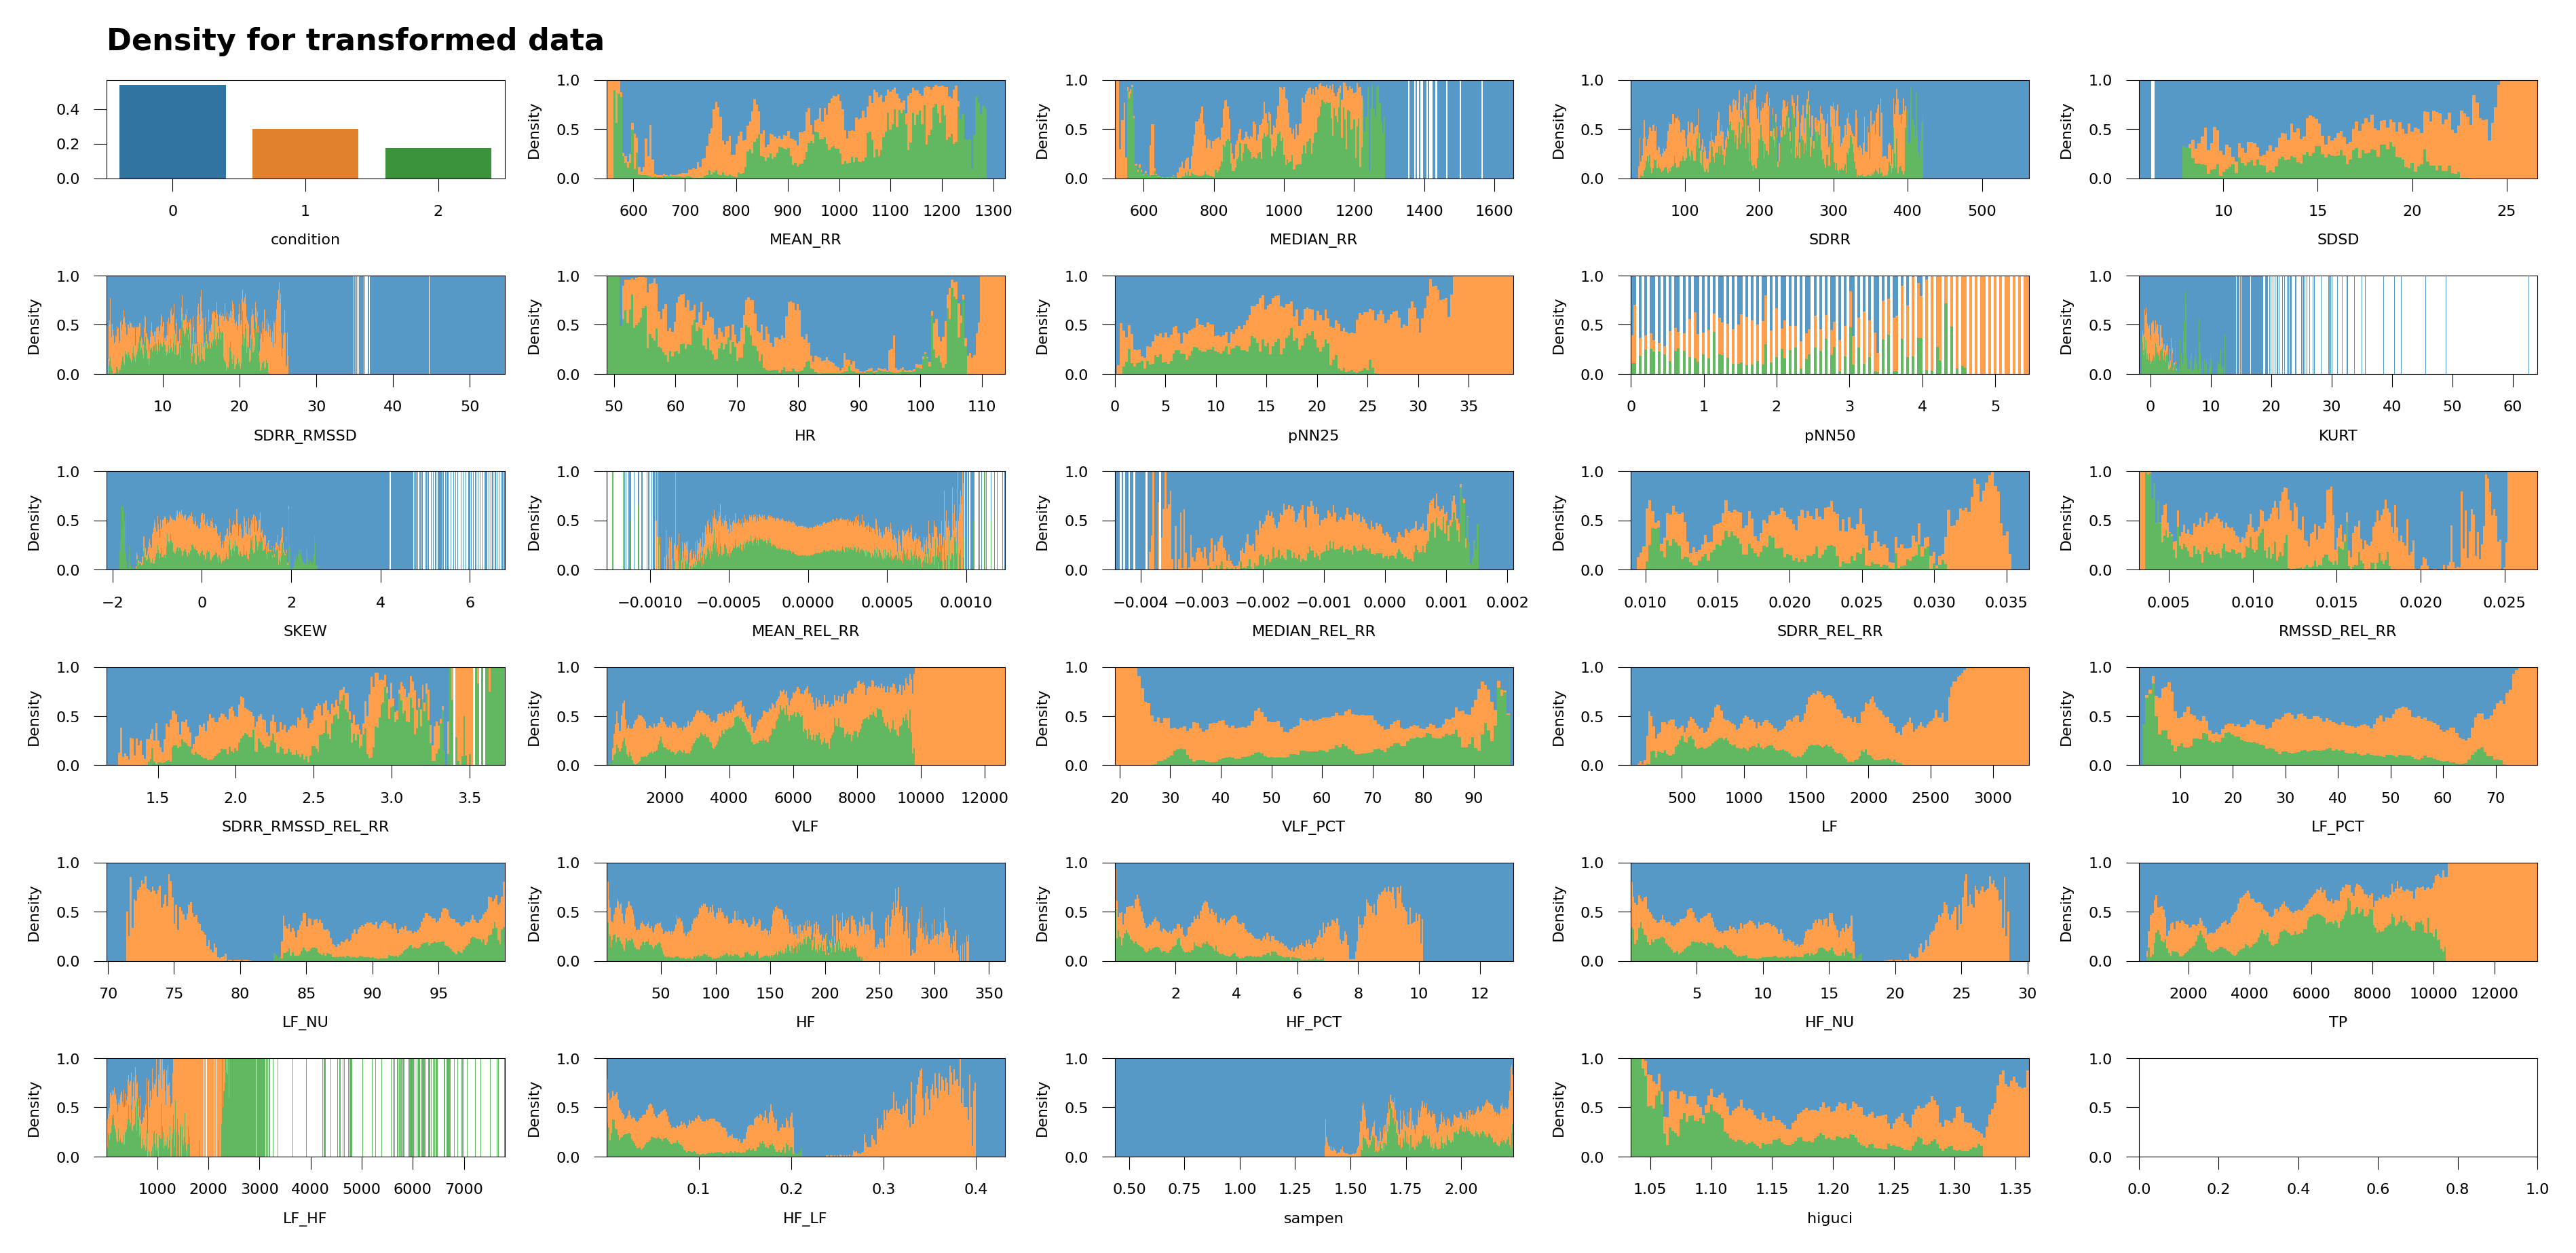

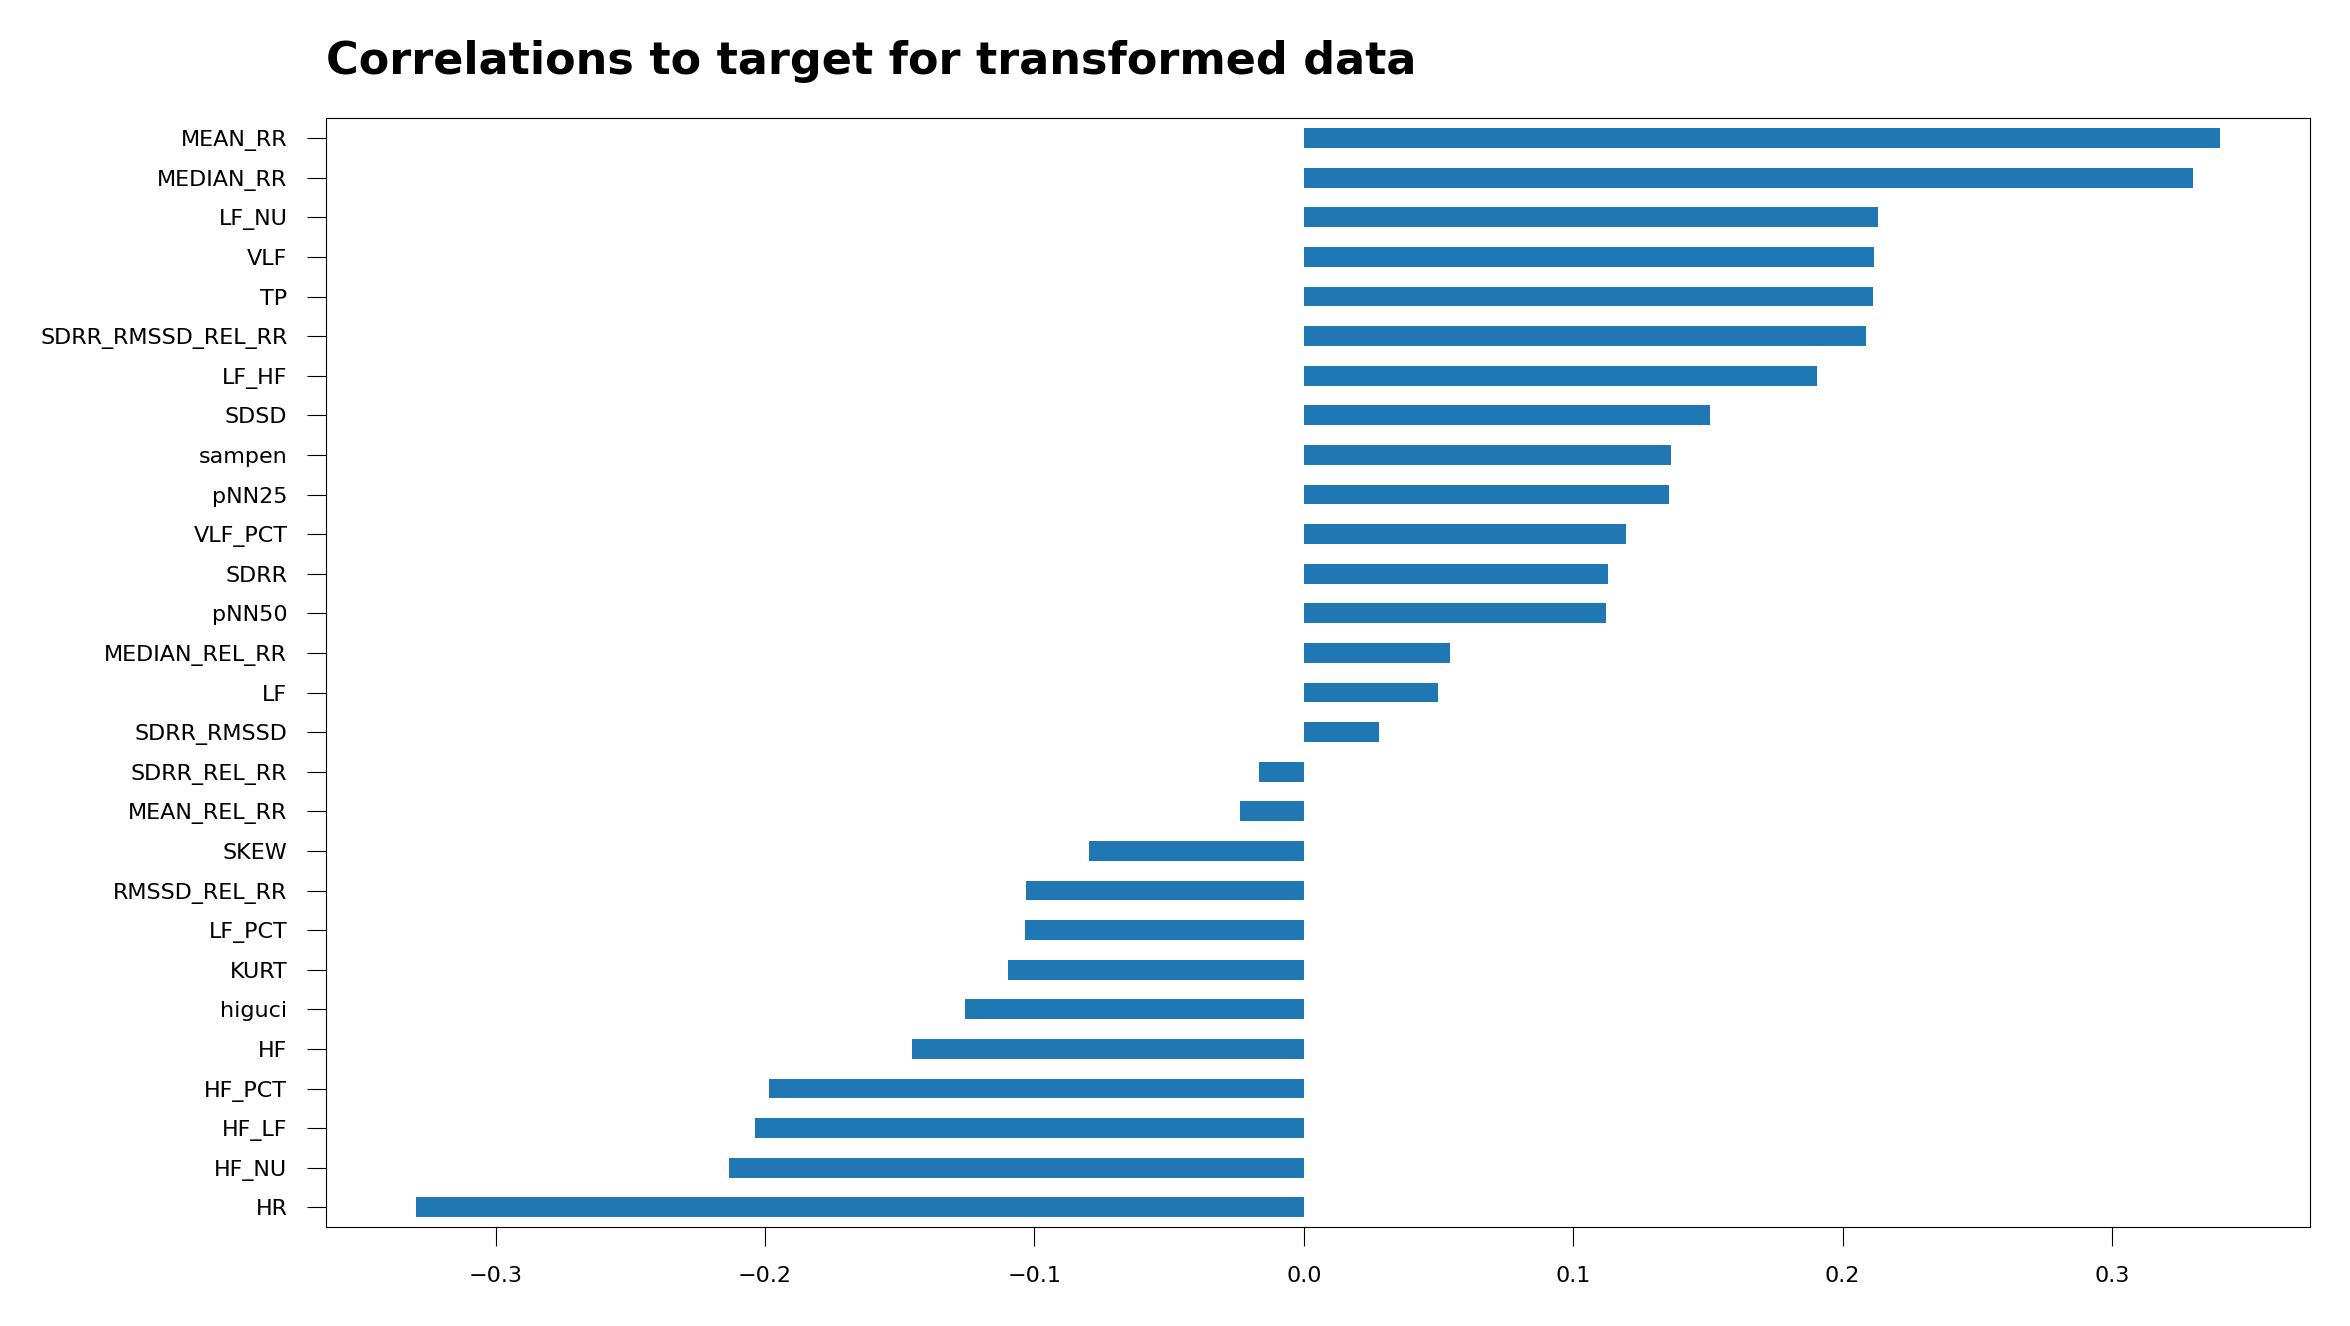

In [16]:
# show the distributions of the data

if DO_PLOT_DATA:
  # set plot parameters
  from pathlib import Path
  import matplotlib.pyplot as plt
  import seaborn as sns

  # reset old global plot parameters
  plt.rcdefaults()

  # adjustable global plot parameters
  COLORMAP = sns.color_palette()
  DPI = 400
  OUTLINE_WIDTH = 0.2
  plt.rcParams['axes.grid'] = False
  plt.rcParams['axes.linewidth'] = OUTLINE_WIDTH
  plt.rcParams['figure.dpi'] = DPI
  plt.rcParams['font.size'] = 4
  plt.rcParams['xtick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['xtick.minor.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.minor.width'] = OUTLINE_WIDTH
  plot_dir = Path(f'../images/{TEST_DATA_NAME}')
  plot_dir.mkdir(parents=True, exist_ok=True)

  from math import ceil

  # adjustable local plot parameters
  TITLE = 'Density for transformed data'
  SUBPLOT_SIZE = (750, 300)

  # setting local plot parameters
  plots_per_col = 5
  shape = (plots_per_col, ceil(exp.dataset_transformed.shape[1] / plots_per_col))
  figsize = tuple(pxs[0] * pxs[1] / DPI for pxs in zip(SUBPLOT_SIZE, shape))
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot grid
  axs = plt.subplots(
    nrows=shape[1],
    ncols=shape[0],
    layout='constrained',
    figsize=figsize,
  )[1].flat

  # plot target distribution
  target_dist_data = exp.y_transformed.value_counts(normalize=True)
  ax = sns.barplot(
    x=target_dist_data.index,
    y=target_dist_data.values,
    ax=axs[0],
    palette=COLORMAP,
  )

  # plot data title and labels
  axs[0].set_title(**title_params)
  axs[0].set_xlabel('condition')
  axs[0].set_xticklabels(exp.y.value_counts().index)

  # plot features distribution
  for x, ax in zip(exp.X_transformed.columns, axs[1:]):
    sns.histplot(
      data=exp.dataset_transformed,
      x=x,
      ax=ax,
      hue=TARGET_NAME,
      legend=False,
      linewidth=0,
      multiple='fill',
      palette=COLORMAP,
      stat='density',
    )

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show(block=False)

  # check correlation between target and features
  # adjustable plot parameters
  TITLE = 'Correlations to target for transformed data'
  PLOT_SIZE = (2560, 1440)

  # setting plot parameters
  figsize = tuple(px / DPI for px in PLOT_SIZE)
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot correlation to target
  target_corr_data = (exp.dataset_transformed
    .corr()[TARGET_NAME]
    .drop(TARGET_NAME)
    .sort_values())
  ax = target_corr_data.plot.barh(figsize=figsize)
  ax.set_title(**title_params)

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show(block=False)

  # reset plot parameters
  plt.rcdefaults()

In [17]:
# compare models with AUROC

if DO_COMPARE_MODELS:
  exp.compare_models(
    exclude=[ # excludes slow and unsuitable models
      'ada',
      'catboost',
      'gbc',
      'knn',
      'lr',
      'ridge',
      'rf',
      'svm',
    ],
    sort='auc',
    cross_validation=False,
  )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.9200
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.4400
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,4.6900
dt,Decision Tree Classifier,0.9997,0.9997,0.9997,0.9997,0.9997,0.9995,0.9995,10.7800
qda,Quadratic Discriminant Analysis,0.6283,0.8488,0.6283,0.7102,0.6290,0.4440,0.4736,1.2200
lda,Linear Discriminant Analysis,0.6256,0.7425,0.6256,0.6113,0.5972,0.3085,0.3274,1.5200
nb,Naive Bayes,0.5410,0.6898,0.5410,0.5586,0.5415,0.2504,0.2543,0.8900
dummy,Dummy Classifier,0.5400,0.0000,0.5400,0.2916,0.3787,0.0000,0.0000,0.8200


In [18]:
# assign the best model id manually
BEST_MODEL_ID = 'xgboost'

best_model = exp.create_model(
  estimator=BEST_MODEL_ID,
  cross_validation=False,
)
display_html(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
 colsample_bylevel=None, colsample_bynode=None,
 colsample_bytree=None, device='cpu', early_stopping_rounds=None,
 enable_categorical=False, eval_metric=None, feature_types=None,
 gamma=None, grow_policy=None, importance_type=None,
 interaction_constraints=None, learning_rate=None, max_bin=None,
 max_cat_threshold=None, max_cat_to_onehot=None,
 max_delta_step=None, max_depth=None, max_leaves=None,
 min_child_weight=None, missing=nan, monotone_constraints=None,
 multi_strategy=None, n_estimators=None, n_jobs=-1,
 num_parallel_tree=None, objective='multi:softprob', ...) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. XGBClassifier XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
 colsample_bylevel=None, colsample_bynode=None,
 colsample_bytree=None, device='cpu', early_stopping_rounds=None,
 enable_categorical=False, eval_metric=None, feature_types=None,
 gamma=None, grow_policy=None, importance_type=None,
 interaction_constraints=None, learning_rate=None, max_bin=None,
 max_cat_threshold=None, max_cat_to_onehot=None,
 max_delta_step=None, max_depth=None, max_leaves=None,
 min_child_weight=None, missing=nan, monotone_constraints=None,
 multi_strategy=None, n_estimators=None, n_jobs=-1,
 num_parallel_tree=None, objective='multi:softprob', ...)

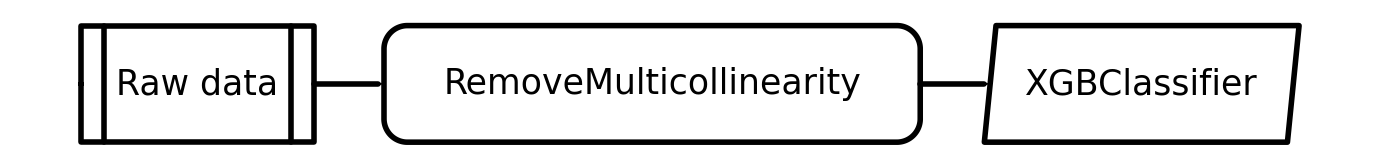

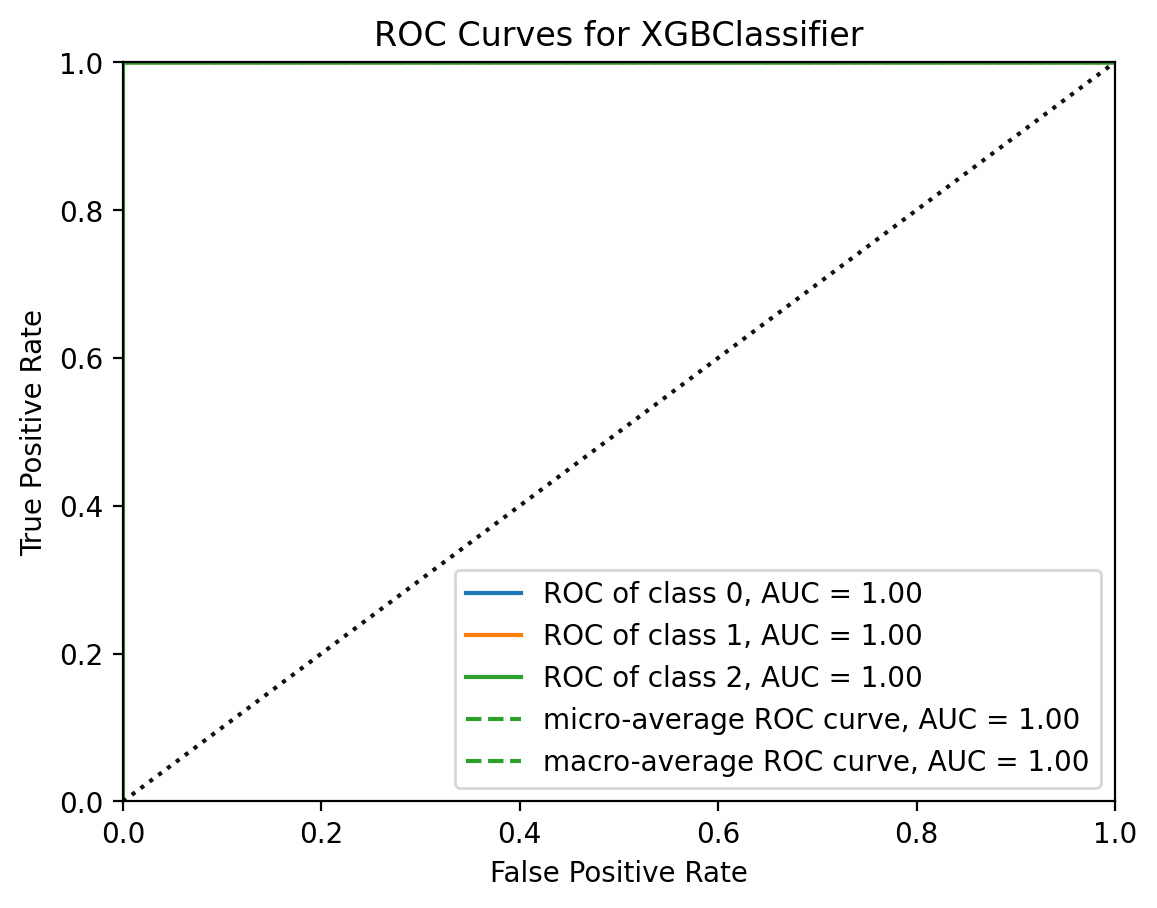

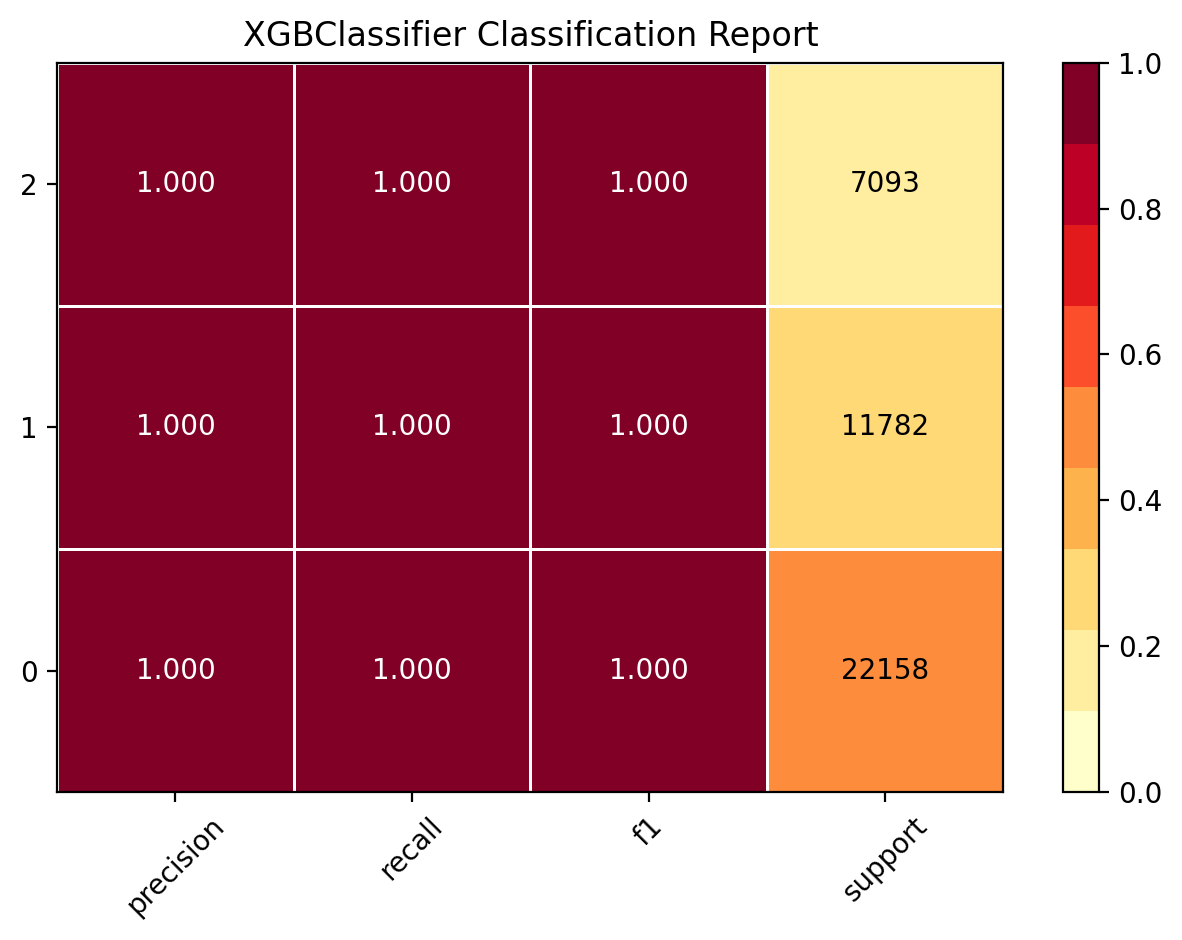

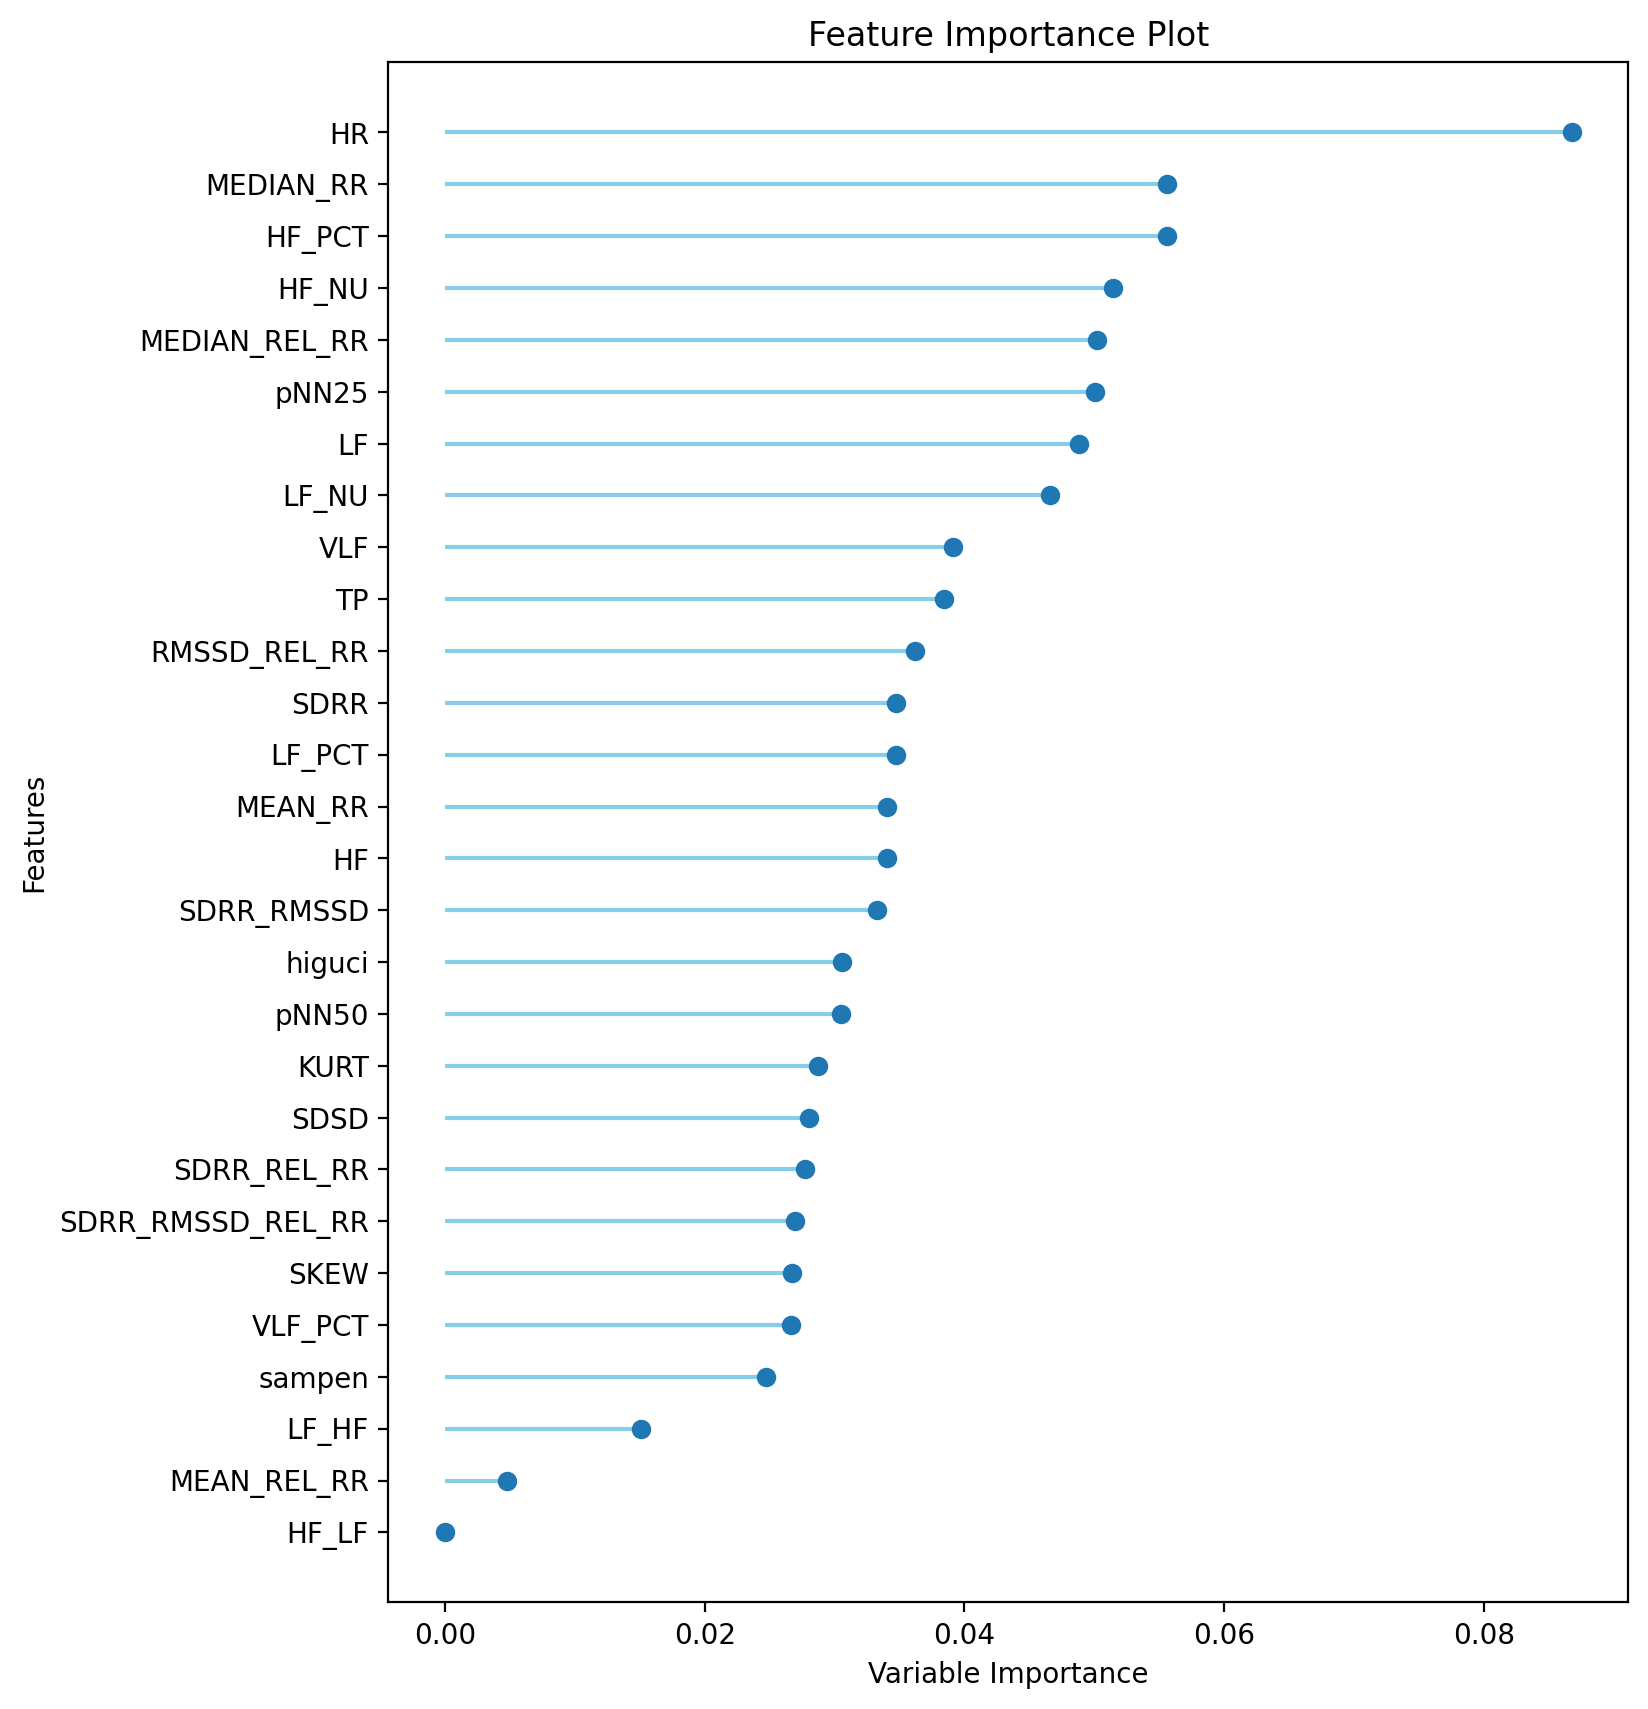

In [19]:
plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=best_model,
    plot=plot_type,
    plot_kwargs={
      'block': False,
    },
    scale=2,
  )

In [20]:
# show hold-out predictions
predictions = exp.predict_model(
  estimator=best_model,
  raw_score=True,
)
display_html(
  predictions
    .drop(columns=exp.dataset.columns)
    .sample(n=15, random_state=123)
)
predictions = None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2
380118,1,0.0001,0.9999,0.0000
369536,0,0.9997,0.0002,0.0002
399645,0,1.0000,0.0000,0.0000
375878,0,0.9996,0.0002,0.0001
385576,0,0.9999,0.0001,0.0000
402199,2,0.0000,0.0000,1.0000
391050,1,0.0002,0.9998,0.0000
397656,0,0.9981,0.0006,0.0013
398352,0,0.9975,0.0005,0.0021
398153,0,0.9980,0.0012,0.0008


In [21]:
# save the experiment and model

if DO_SAVE_RESULTS:
  from pathlib import Path

  result_dir = Path(f'../models/{TEST_DATA_NAME}')
  result_dir.mkdir(
    parents=True,
    exist_ok=True,
  )
  exp.save_experiment(
    path_or_file=result_dir.joinpath('experiment.pkl'),
  )
  exp.save_model(
    model=best_model,
    model_name=result_dir.joinpath('model'),
  )

Transformation Pipeline and Model Successfully Saved
